# LABORATORIO 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### FUNCIONES

In [2]:
def linear_cost(X, y, theta, lam):
    h = X @ theta
    reg = (lam / (2*len(x))) * np.sum(np.square(theta))
    return ((y - h) ** 2).sum() / (2 * len(x)) + reg

In [3]:
def linear_cost_gradient(X, y, theta, lam):
    h = X @ theta
    return (((h - y).T @ X).T + (lam*theta)) / len(x)

In [4]:
def gradient_descent(
    X,
    y,
    theta_0,
    cost_function,
    cost_function_gradient,
    learning_rate = 0.01,
    threshold = 0.001,
    max_iter = 10000,
    lam = 10
):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []
    
    while np.linalg.norm(cost_function_gradient(X, y, theta,lam)) > threshold and iteration < max_iter:
        iteration += 1
        theta = theta - (learning_rate * cost_function_gradient(X, y, theta,lam))
        costs.append(cost_function(X, y, theta,lam))
        thetas.append(theta.copy())
        
    return theta, costs, thetas


In [5]:
def hypothesis(X, theta):
    y1 = X @ theta
    return np.sum(y1, axis=1)

### DATOS

In [13]:
x = np.genfromtxt('/Users/maria/OneDrive/Documentos/mle/Admission_Predict.csv',delimiter=',',skip_header=1)
print(type(x), x.shape)

<class 'numpy.ndarray'> (400, 9)


In [12]:
y = np.array([x[:,7]]).T
X = np.array(x[:,[1,2,3,4,5,6]], copy=False, subok=True, ndmin=2)
m = len(X)
unos = np.ones((m,1))
X = np.concatenate((unos,X), axis = 1)
m,n = X.shape
print(X.shape, y.shape, X)

(400, 7) (400, 1) [[  1.   337.   118.   ...   4.5    4.5    9.65]
 [  1.   324.   107.   ...   4.     4.5    8.87]
 [  1.   316.   104.   ...   3.     3.5    8.  ]
 ...
 [  1.   330.   116.   ...   5.     4.5    9.45]
 [  1.   312.   103.   ...   3.5    4.     8.78]
 [  1.   333.   117.   ...   5.     4.     9.66]]


In [14]:
theta_0 = np.random.rand(n, 1)

### SPLIT CROSS-VALIDATION

In [18]:
trainingx, cvx, testx = np.split(X, [int(len(X)*0.60), int(len(X)*0.80)])
trainingy, cvy, testy = np.split(y, [int(len(y)*0.60), int(len(y)*0.80)])

In [23]:
x_training = trainingx[:, :]
x_cv = cvx[:, :]
x_test = testx[:, :]

y_training = trainingy[:, :]
y_cv = cvy[:, :]
y_test = testy[:, :]

In [24]:
# PARA LOS POLINOMIOS MAS ALTOS
x_training2 = 1 + x_training + x_training**2
x_training3 = 1 + x_training + x_training2 + x_training**3

x_test2 = x_test**2
x_test3 = x_test**3

print(x_test.shape, y_test.shape)

(80, 7) (80, 1)


## POLINOMIO GRADO 1
#### Regulado con lambda

In [161]:
t, c, ts = gradient_descent(
    x_training,
    y_training,
    theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=0.00000001,
    threshold=5,
    lam =10
)

In [162]:
print('RESULTADOS \nTheta 0:          {:0.3f},\nTheta 1:          {:0.3f}, \nTheta 2:          {:0.3f},\nTheta 3:          {:0.3f}, \nTheta 4:          {:0.3f},\nTheta 5:          {:0.3f}, \nTheta 6:          {:0.3f}'.format(t[0][0],t[1][0],t[2][0],t[3][0],t[4][0],t[5][0],t[6][0]))
print('Ecuacion lineal de notas: {:0.3f} + {:0.3f} X1 + {:0.3f} X2 + {:0.3f} X3 + {:0.3f} X4 + {:0.3f} X5 + {:0.3f} X6'.format(t[0][0],t[1][0],t[2][0],t[3][0],t[4][0],t[5][0],t[6][0]))
print('Minimo:  {:0.3f}'.format(c[-1]))

RESULTADOS 
Theta 0:          0.152,
Theta 1:          -0.108, 
Theta 2:          0.193,
Theta 3:          0.816, 
Theta 4:          0.917,
Theta 5:          0.415, 
Theta 6:          0.755
Ecuacion lineal de notas: 0.152 + -0.108 X1 + 0.193 X2 + 0.816 X3 + 0.917 X4 + 0.415 X5 + 0.755 X6
Minimo:  1.492


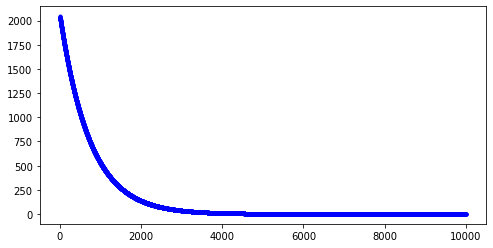

In [164]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(10000),c,'b.')

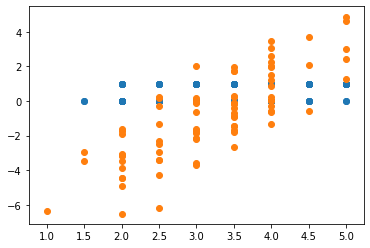

In [165]:
pred = hypothesis(x_test,t)
plt.figure()
plt.scatter(x=x_training[:,5],y= y_training)          
plt.scatter(x=x_test[:,5], y=pred)
plt.show()

Minimo:  0.721


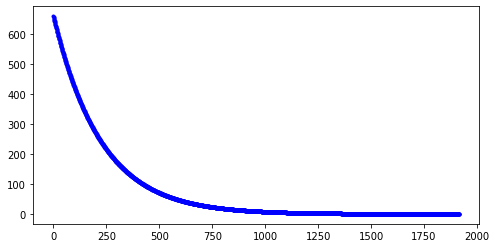

In [40]:
#Cross Validation
tcv, ccv, tscv = gradient_descent(
    x_cv,
    y_cv,
    theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=0.0000001,
    threshold=75,
    lam = 10
)

print('Minimo:  {:0.3f}'.format(ccv[-1]))

fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(1917),ccv,'b.')

## ANALISIS

Entre mayor lamda disminuia el costo del gradiente y se dispersaban los puntos en el scatter plot.
Al validar con el cross validation, la diferencia es de 0.7, por lo que el polinomio de grado 1 es confiable.

En los polinomios de grado 2 y 3 a continuacion, necesitaban un lambda mucho mas bajo.
Un lambda bajo indica que el modelo tiene BIAS
El altisimo gradiente minimo de los polinomios evidencia este bias


### POLINOMIO GRADO 2

In [131]:
t1, c1, ts1 = gradient_descent(
    x_training2,
    y_training,
    theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=0.0000000000001,
    threshold=350,
    lam=-100000
)

In [132]:
print('RESULTADOS \nTheta 0:          {:0.3f},\nTheta 1:          {:0.3f}, \nTheta 2:          {:0.3f},\nTheta 3:          {:0.3f}, \nTheta 4:          {:0.3f},\nTheta 5:          {:0.3f}, \nTheta 6:          {:0.3f}'.format(t1[0][0],t1[1][0],t1[2][0],t1[3][0],t1[4][0],t1[5][0],t1[6][0]))
print('Ecuacion lineal de notas: {:0.3f} + {:0.3f} X1 + {:0.3f} X2 + {:0.3f} X3 + {:0.3f} X4 + {:0.3f} X5 + {:0.3f} X6'.format(t1[0][0],t1[1][0],t1[2][0],t1[3][0],t1[4][0],t1[5][0],t1[6][0]))
print('Minimo:  {:0.3f}'.format(c1[-1]))

RESULTADOS 
Theta 0:          0.153,
Theta 1:          -0.031, 
Theta 2:          0.255,
Theta 3:          0.818, 
Theta 4:          0.919,
Theta 5:          0.418, 
Theta 6:          0.762
Ecuacion lineal de notas: 0.153 + -0.031 X1 + 0.255 X2 + 0.818 X3 + 0.919 X4 + 0.418 X5 + 0.762 X6
Minimo:  10713.419


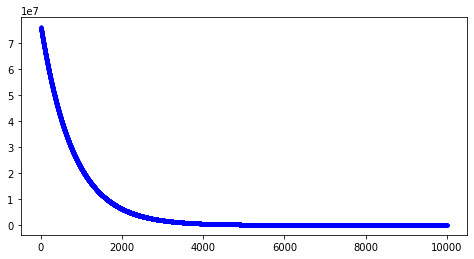

In [133]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(10000),c1,'b.')

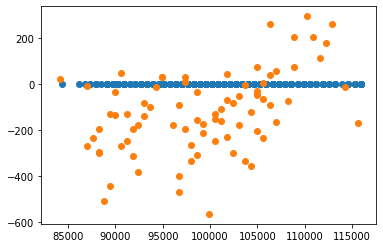

In [134]:
pred2 = hypothesis(x_test2,t1)
plt.figure()
plt.scatter(x=x_training2[:,1],y= y_training)          
plt.scatter(x=x_test2[:,1], y=pred2)
plt.show()

### POLINOMIO GRADO 3

In [143]:
t3, c3, ts3 = gradient_descent(
    x_training3,
    y_training,
    theta_0,
    linear_cost,
    linear_cost_gradient,
    learning_rate=0.000000000000000001,
    threshold=150,
    lam=-100000
)

In [144]:
print('RESULTADOS \nTheta 0:          {:0.3f},\nTheta 1:          {:0.3f}, \nTheta 2:          {:0.3f},\nTheta 3:          {:0.3f}, \nTheta 4:          {:0.3f},\nTheta 5:          {:0.3f}, \nTheta 6:          {:0.3f}'.format(t3[0][0],t3[1][0],t3[2][0],t3[3][0],t3[4][0],t3[5][0],t3[6][0]))
print('Ecuacion lineal de notas: {:0.3f} + {:0.3f} X1 + {:0.3f} X2 + {:0.3f} X3 + {:0.3f} X4 + {:0.3f} X5 + {:0.3f} X6'.format(t3[0][0],t3[1][0],t3[2][0],t3[3][0],t3[4][0],t3[5][0],t3[6][0]))
print('Minimo:  {:0.3f}'.format(c3[-1]))

RESULTADOS 
Theta 0:          0.153,
Theta 1:          -0.011, 
Theta 2:          0.267,
Theta 3:          0.818, 
Theta 4:          0.919,
Theta 5:          0.418, 
Theta 6:          0.762
Ecuacion lineal de notas: 0.153 + -0.011 X1 + 0.267 X2 + 0.818 X3 + 0.919 X4 + 0.418 X5 + 0.762 X6
Minimo:  301937411.308


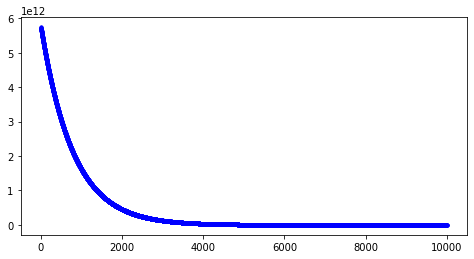

In [145]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(10000),c3,'b.')

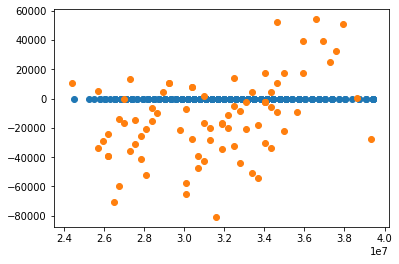

In [146]:
pred3 = hypothesis(x_test3,t3)
plt.figure()
plt.scatter(x=x_training3[:,1],y=y_training)          
plt.scatter(x=x_test3[:,1], y=pred3)
plt.show()